## NAO-matching verification ##

Verifying NAO-matching methodology by replicating column 1 of Figure 3 from "North Atlantic climate far more predictable than models imply" 2020 paper (doi: https://doi.org/10.1038/s41586-020-2525-0)

In [1]:
# Notebook magic
%matplotlib inline
# Autoreload
%load_ext autoreload
%autoreload 2

# Local Imports
import os
import sys
import glob

# Third-Party Imports
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# Local imports
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# Import dicts from further afield
sys.path.append("/home/users/benhutch/energy-met-corr")
import dictionaries_em as dicts_em

# # Import functions from skill-maps
sys.path.append("/home/users/benhutch/skill-maps/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions
import functions as fnc

# Import functions from plot_init_benefit
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import plot_init_benefit as pib_fnc

# Import the nao_matching_seasons functions
import nao_matching_seasons as nao_match_fnc

# Import the functions from process_bs_values
import process_bs_values as pbs_func

# Import the functions from nao_alt_lag_functions
import nao_alt_lag_functions as nal_fnc

In [3]:
# Import the functions from paper1_plots_functions
import paper1_plots_functions as p1_fnc

In [4]:
# Set up the variables
season = "DJFM"
forecast_range = "2-9"
start_year = 1961
end_year = 2014
lag = 4
region = "global"
variable = "tas"
grid = dicts_em.uk_grid
gridbox_name = "Clark UK"
data_dir = (
    "/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/test-sfcWind/"
)

In [5]:
# load the lagged data
lagged_data = nal_fnc.load_data(
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=2, # slightly weird alternate lag data
    method=None,
    region=region,
    variable=variable,
    data_dir="/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data",
)

# load the NAO-matched data
nao_matched_data = nal_fnc.load_data(
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    method="nao_matched",
    region=region,
    variable=variable,
    data_dir="/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/test-sfcWind/",
)

More than one file found
Using the latest datetime file: /gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/tas_DJFM_global_1961_2014_2-9_2_1707299104.971751.npy


/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py:221: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  datetimes = [pd.to_datetime(datetime, unit="s") for datetime in datetimes]


Shape of the data: (54, 178, 9, 72, 144)
Loading the nao matched data
Shape of the data: (20, 51, 72, 144)


In [6]:
# print the shape of the data
print(lagged_data.shape)

# print the shape of the data
print(nao_matched_data.shape)

(54, 178, 9, 72, 144)
(20, 51, 72, 144)


In [7]:
# For the raw data, take the average of years 2-9
# if lagged data has 5 dimensions
if len(lagged_data.shape) == 5:
    lagged_data = np.mean(lagged_data[:, :, : 7 + 1, :, :], axis=2)

In [8]:
# skip over the first 3 values
lagged_data = lagged_data[3:, :, :, :]

In [9]:
# print the shape of the data
print(lagged_data.shape)

# print the shape of the data
print(nao_matched_data.shape)

(51, 178, 72, 144)
(20, 51, 72, 144)


In [10]:
# create an array of start years
init_years = np.arange(1964, end_year + 1)

In [11]:
# find the indexes of years 1985 and 1989 in init years
init_years_1985 = np.where(init_years == 1985)[0][0]
init_years_1989 = np.where(init_years == 1989)[0][0]

In [12]:
init_years_1985, init_years_1989

(np.int64(21), np.int64(25))

In [13]:
# subset the lagged data and nao matched data to these years
lagged_data_period = lagged_data[init_years_1985 : init_years_1989 + 1, :, :, :]
nao_matched_data_period = nao_matched_data[
    :, init_years_1985 : init_years_1989 + 1, :, :
]

In [14]:
# print the shape of this data
print(lagged_data_period.shape)
print(nao_matched_data_period.shape)

(5, 178, 72, 144)
(20, 5, 72, 144)


In [15]:
# load the observed data for the same period
obs_anoms = fnc.read_obs(
    variable=variable,
    region=region,
    forecast_range=forecast_range,
    season=season,
    observations_path=nao_match_fnc.find_obs_path(match_var=variable),
    start_year=1960,
    end_year=2023,
)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [16]:
# limit obs to between 1969 and 2019
obs_anoms = obs_anoms.sel(time=slice("1969-01-01", "2019-12-31"))

In [17]:
obs_anoms_arr = obs_anoms.values

In [18]:
obs_anoms_arr.shape

(51, 72, 144)

In [19]:
# subset to the same years as the model data
obs_anoms_arr_period = obs_anoms_arr[init_years_1985 : init_years_1989 + 1, :, :]

In [20]:
obs_anoms_arr_period.shape

(5, 72, 144)

In [21]:
# calculate the obs anoms for the period
obs_anoms_period = np.mean(obs_anoms_arr_period, axis=0) - np.mean(
    obs_anoms_arr, axis=0
)

In [22]:
# calculate the standard deviation of the lagged and NAO-matched ensmeble means
lagged_data_sigma = np.std(np.mean(lagged_data, axis=1), axis=0)

# calculate the sigma of the NAO-matched data
nao_matched_data_sigma = np.std(np.mean(nao_matched_data, axis=0), axis=0)

In [23]:
# print the values
print("Lagged data sigma: ", lagged_data_sigma.shape)
print("NAO-matched data sigma: ", nao_matched_data_sigma.shape)

Lagged data sigma:  (72, 144)
NAO-matched data sigma:  (72, 144)


In [24]:
# calculate the model anoms values
lagged_anoms = np.mean(lagged_data_period, axis=(0, 1)) - np.mean(
    lagged_data, axis=(0, 1)
)
nao_matched_anoms = np.mean(nao_matched_data_period, axis=(0, 1)) - np.mean(
    nao_matched_data, axis=(0, 1)
)

In [27]:
# standardise the anoms
lagged_anoms_std = lagged_anoms / lagged_data_sigma
nao_matched_anoms_std = nao_matched_anoms / nao_matched_data_sigma

# standardise the obs anoms
obs_anoms_period_std = obs_anoms_period / np.std(obs_anoms_arr, axis=0)

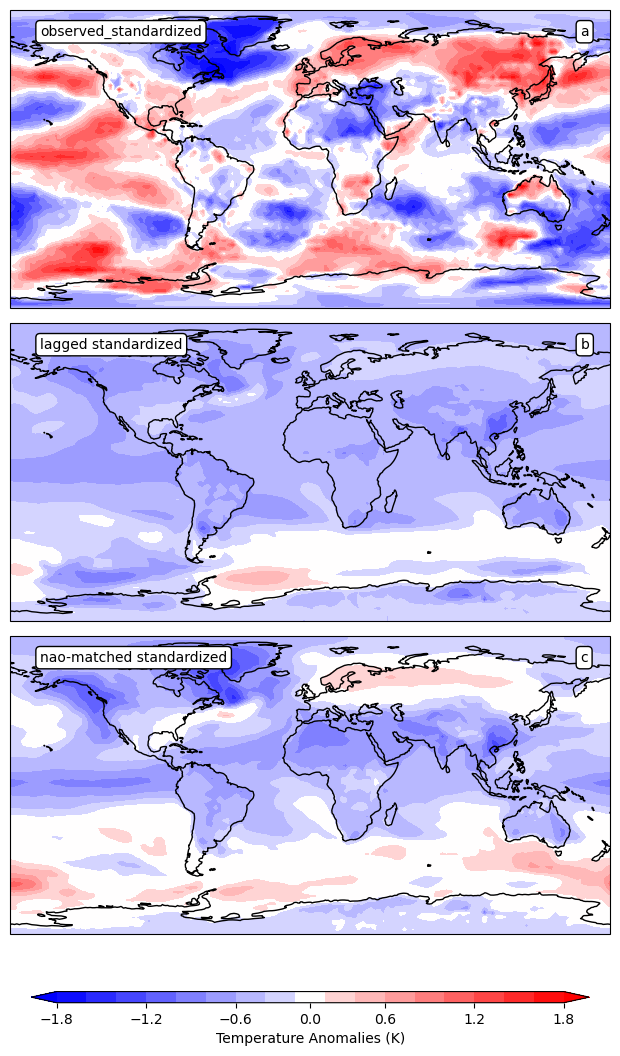

In [28]:
# Set up a figure with 1 column and 3 rows
fig, axs = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the axis labels
axis_labels = ["a", "b", "c"]

# set up the titles
titles = ["observed_standardized", "lagged standardized", "nao-matched standardized"]

# set up the arrays
data_arrays = [obs_anoms_period_std, lagged_anoms_std, nao_matched_anoms_std]

# Adjust the whitespace
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# Set up the lats and lons
lons = np.arange(-180, 180, 2.5)
lats = np.arange(-90, 90, 2.5)

# set up clevs between -2 and 2
clevs = np.array([-1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])

# loop over the axs, labels, titles and data arrays
for ax, label, title, data_array in zip(axs, axis_labels, titles, data_arrays):

    # include coastlines
    ax.coastlines()
    
    # Set up the cf object
    cf = ax.contourf(lons, lats, data_array, clevs, cmap="bwr", transform=ccrs.PlateCarree(), extend="both")

    # include a textbox in the top left corner with the label
    ax.text(0.05, 0.95, f"{title}", transform=ax.transAxes, fontsize=10, verticalalignment="top", bbox=dict(facecolor="white", edgecolor="k", boxstyle="round,pad=0.3"))

    # include a label in the top right with the label
    ax.text(0.95, 0.95, f"{label}", transform=ax.transAxes, fontsize=10, verticalalignment="top",bbox=dict(facecolor="white", edgecolor="k", boxstyle="round,pad=0.3"))

# include a colorbar
cbar = fig.colorbar(cf, ax=axs, orientation="horizontal", shrink=0.9, pad=0.05, aspect=50)

# Set the ticks manually
ticks = np.array([-1.8, -1.2, -0.6, 0.0, 0.6, 1.2, 1.8])

# set the ticks
cbar.set_ticks(ticks)

# Set the title of the ticks
cbar.set_label("Temperature Anomalies (K)", fontsize=10)